# Lab 2
## Exploratory analysis

In [76]:
import pandas as pd
%pip install statsmodels
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels as sm
import statsmodels.tsa as tsa
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Majix\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


# Laboratorio 2
### Majo Gil 20337
### Joshua Chicoj 20566

In [77]:
dateparse = lambda dates: pd.to_datetime(dates, format='%Y-%m')

data_precios = pd.read_excel('./data/PreciosCombustible.xlsx', parse_dates=['MES/AÑO'], date_parser=dateparse)
data_gas = pd.read_excel('./data/PreciosGas.xlsx', parse_dates=['MES/AÑO'], date_parser=dateparse)
data_impor = pd.read_excel('./data/IMPORTACION-VOLUMEN-2024-05.xlsx', parse_dates=['Fecha'], date_parser=dateparse)
data_consumo = pd.read_excel('./data/CONSUMO-2024-05.xlsx', parse_dates=['Fecha'], date_parser=dateparse)

data_precios.set_index('MES/AÑO', inplace=True)
data_gas.set_index('MES/AÑO', inplace=True)
data_impor.set_index('Fecha', inplace=True)
data_consumo.set_index('Fecha', inplace=True)

C:\Users\Majix\AppData\Local\Temp\ipykernel_19504\3610446096.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data_precios = pd.read_excel('./data/PreciosCombustible.xlsx', parse_dates=['MES/AÑO'], date_parser=dateparse)
C:\Users\Majix\AppData\Local\Temp\ipykernel_19504\3610446096.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data_gas = pd.read_excel('./data/PreciosGas.xlsx', parse_dates=['MES/AÑO'], date_parser=dateparse)
C:\Users\Majix\AppData\Local\Temp\ipykernel_19504\3610446096.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to

In [78]:
data_precios.describe()

,GASOLINA SUPERIOR,GASOLINA REGULAR,ACEITE COMBUSTIBLE DIÉSEL
count,263.000000,263.000000,263.000000
mean,27.345095,26.404183,23.223422
std,6.260523,6.073722,7.004280
min,14.860000,14.520000,9.880000
25%,22.835000,21.820000,18.350000
50%,27.100000,26.070000,21.850000
75%,33.705000,32.605000,30.160000
max,42.140000,40.160000,39.930000


In [79]:
data_gas.describe()

,Gas 25lbs,Gas 35lbs,Gas 40lbs,Gas 60lbs,Gas100lbs
count,263.000000,263.000000,263.000000,263.000000,263.000000
mean,103.189924,144.436426,167.232433,250.932662,416.507871
std,24.511275,34.407027,40.623983,61.281997,103.492353
min,38.950000,54.990000,65.960000,93.480000,154.740000
25%,90.485000,126.690000,144.690000,216.755000,360.555000
50%,105.000000,147.000000,168.000000,252.000000,420.000000
75%,120.685000,168.905000,193.750000,291.255000,487.010000
max,146.000000,206.000000,227.000000,340.800000,568.000000


In [80]:
data_consumo.describe()

,Diesel,Gas licuado de petróleo,Gasolina regular,Gasolina superior
count,2.930000e+02,293.000000,293.000000,293.000000
mean,8.697828e+05,312350.791082,386490.157486,464562.247013
std,2.185603e+05,109315.234878,209541.304568,108349.195858
min,5.076627e+05,167818.137897,160741.900000,300242.781667
25%,6.996108e+05,225886.426190,214509.650000,382078.880000
50%,8.076921e+05,262255.138095,285089.040000,420238.710000
75%,1.032813e+06,393901.921429,524242.310000,565665.720000
max,1.463008e+06,588892.160000,894533.140000,768102.830000


In [81]:
data_impor.describe()

,Diesel,Gas licuado de petróleo,Gasolina regular,Gasolina superior
count,2.810000e+02,2.810000e+02,281.000000,2.810000e+02
mean,8.815024e+05,4.091257e+05,401433.017451,4.853736e+05
std,2.856735e+05,1.973531e+05,234159.202453,1.539939e+05
min,2.297647e+05,1.005615e+05,81015.300000,1.702925e+05
25%,6.869238e+05,2.252070e+05,205624.080000,3.668863e+05
50%,8.429935e+05,4.100011e+05,320566.690000,4.704840e+05
75%,1.095743e+06,5.656279e+05,548714.530000,5.958704e+05
max,1.595699e+06,1.077123e+06,987872.050000,1.227174e+06


In [82]:
data_precios.head()

,GASOLINA SUPERIOR,GASOLINA REGULAR,ACEITE COMBUSTIBLE DIÉSEL
MES/AÑO,,,
2002-07-01,14.86,14.52,9.88
2002-08-01,15.68,15.29,10.28
2002-09-01,15.63,15.21,10.24
2002-10-01,16.00,15.57,10.56
2002-11-01,16.12,15.69,16.45


In [83]:
data_gas.head()

,Gas 25lbs,Gas 35lbs,Gas 40lbs,Gas 60lbs,Gas100lbs
MES/AÑO,,,,,
2002-07-01,38.95,54.99,65.96,93.48,154.74
2002-08-01,39.75,55.08,66.46,95.40,156.00
2002-09-01,43.97,60.79,73.79,105.53,172.53
2002-10-01,52.84,73.27,85.52,126.82,207.95
2002-11-01,54.98,76.32,89.59,131.95,217.09


In [84]:
data_consumo.head()

,Diesel,Gas licuado de petróleo,Gasolina regular,Gasolina superior
Fecha,,,,
2002-01-01,634667.06,194410.476190,202645.20,308156.82
2002-01-02,642380.66,174710.552381,205530.96,307766.31
2002-01-03,699807.25,189234.066667,229499.56,331910.29
2002-01-04,586803.98,174330.607143,210680.40,315648.08
2002-01-05,656948.20,191745.147619,208164.34,319667.97


In [85]:
data_impor.head()

,Diesel,Gas licuado de petróleo,Gasolina regular,Gasolina superior
Fecha,,,,
2001-01-01,566101.99,194065.738095,177776.50,373963.96
2001-02-01,489525.80,170703.380952,123115.99,243091.07
2001-03-01,575559.68,161837.371429,161726.42,312084.38
2001-04-01,437745.42,163048.642857,127338.74,285054.89
2001-05-01,552609.13,171518.861905,168730.19,300913.67


### Variables description

#### Quantitative variables
- Gasolina Superior: Precio de la gasolina superior
- Gasolina Regular: Precio de la gasolina regular
- Diesel: Precio del combustible Diesel
- Gas licuado de petróleo: Precio del gas de petróleo
- Gas 25lbs: Precio del gas de petróleo en tambos de 25lbs
- Gas 35lbs: Precio del gas de petróleo en tambos de 35lbs
- Gas 40lbs: Precio del gas de petróleo en tambos de 40lbs
- Gas 60lbs: Precio del gas de petróleo en tambos de 60lbs
- Gas 100lbs: Precio del gas de petróleo en tambos de 100lbs

#### Qualitative variables
- Fecha: Mes y año en el que se tomaron los datos

## Datos de la serie de tiempo
- Serie de precios
  - Inicio: Septiembre 2002
  - Final: Mayo 2024
  - Frecuencia: Mensual

- Serie de importaciones
  - Inicio: Enero 2001
  - Final: Mayo 2024
  - Frecuencia: Mensual

- Serie de consumo
  - Inicio: Enero 2002
  - Final: Mayo 2024
  - Frecuencia: Mensual

## Train and test

In [86]:
train_size = int(len(data_precios) * 0.7)
train_precios = data_precios[0:train_size]
test_precios = data_precios[train_size:len(data_precios)]

train_size = int(len(data_gas) * 0.7)
train_gas = data_gas[0:train_size]
test_gas = data_gas[train_size:len(data_gas)]

train_size = int(len(data_impor) * 0.7)
train_impor = data_impor[0:train_size]
test_impor = data_impor[train_size:len(data_impor)]

train_size = int(len(data_consumo) * 0.7)
train_consumo = data_consumo[0:train_size]
test_consumo = data_consumo[train_size:len(data_consumo)]


## Plot time series

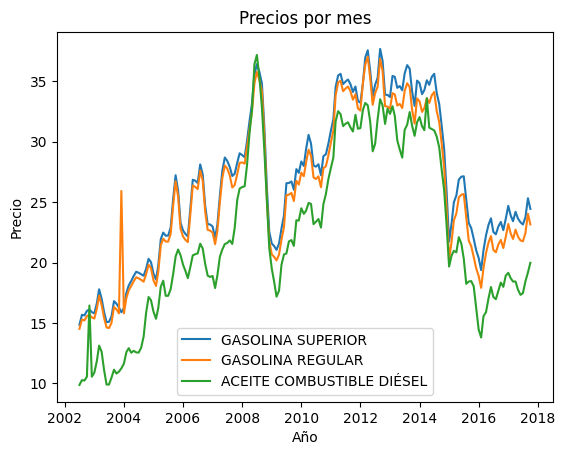

In [87]:
for column in train_precios.columns:
    plt.plot(train_precios.index, train_precios[column], label=column)

plt.gca().set(title="Precios por mes", xlabel="Año", ylabel="Precio")
plt.legend()
plt.show()

En este caso, podemos ver que todos los elementos tienen una variación considerable, la cual, no parece ser estacional. Además no se ve ninguna tendencia clara

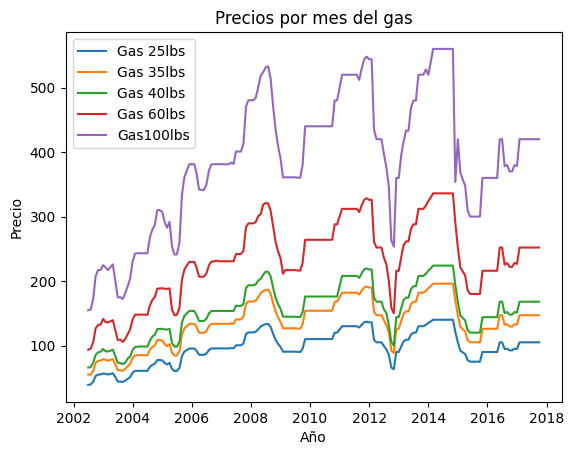

In [88]:
for column in train_gas.columns:
    plt.plot(train_gas.index, train_gas[column], label=column)

plt.gca().set(title="Precios por mes del gas", xlabel="Año", ylabel="Precio")
plt.legend()
plt.show()

EN este caso podemos ver que el gas fluctua de la misma manera en todas sus presentaciones. Así como en la gasolina, no parece haber una estacionalidad o tendencia definida

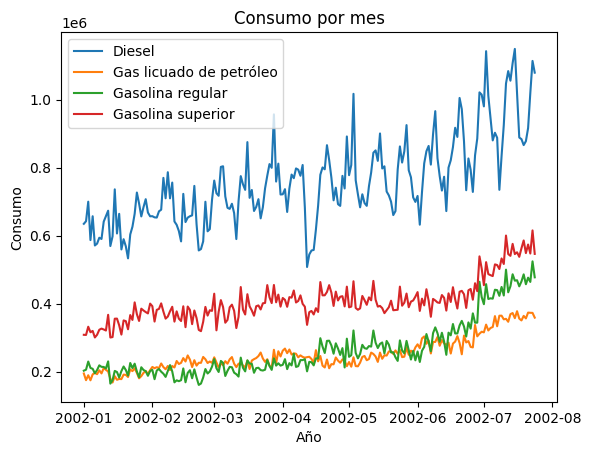

In [89]:
for column in train_consumo.columns:
    plt.plot(train_consumo.index, train_consumo[column], label=column)

plt.gca().set(title="Consumo por mes", xlabel="Año", ylabel="Consumo")
plt.legend()
plt.show()

Vemos cómo todos tienen una tendencia a subir a lo largo de los años, y parece ser que sí hay un cierto tipo de estacionalidad por año, aunque es difícil de determinar con esta gráfica

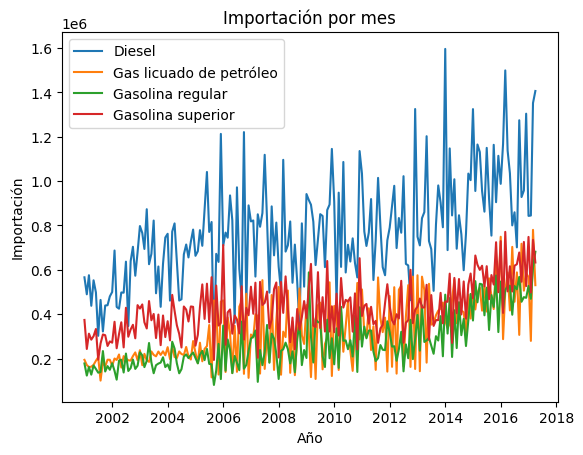

In [90]:
for column in train_impor.columns:
    plt.plot(train_impor.index, train_impor[column], label=column)

plt.gca().set(title="Importación por mes", xlabel="Año", ylabel="Importación")
plt.legend()
plt.show()

En este caso, igual que en la enterior, parece que en general, los precios de las importaciones se elevan con el tiempo, sin embargo, aquí la fluctuación es bastante más fuerte, y no parece haber estacionalidad, al menos a simple vista

## Descomposición de la series

### Tendencias

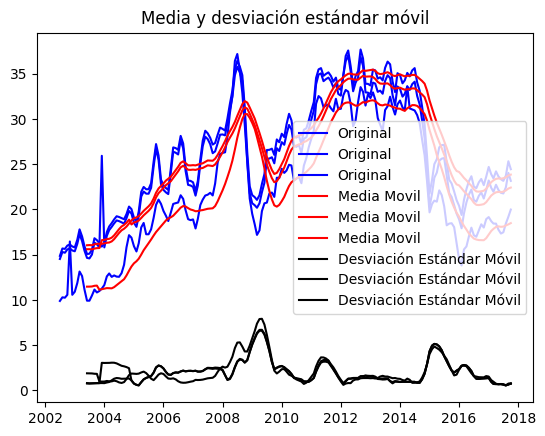

In [91]:
mediaMovil = train_precios.rolling(window=12).mean()
deMovil = train_precios.rolling(window=12).std()

original = plt.plot(train_precios, color="blue", label="Original")
media = plt.plot(mediaMovil, color='red', label = 'Media Movil')
ds = plt.plot(deMovil,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)

Parece ser que hay una tendencia más bien como cuadrática, pero la variabilidad sigue siendo considerable

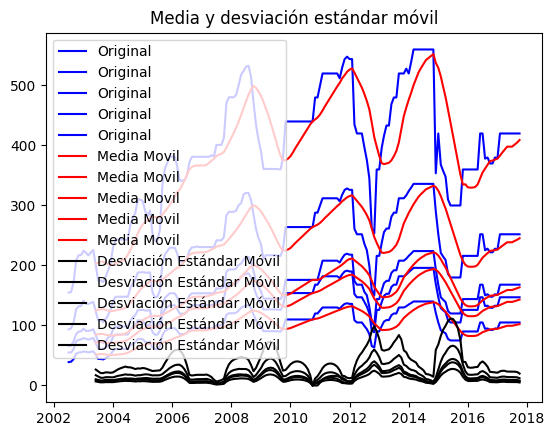

In [92]:
mediaMovil = train_gas.rolling(window=12).mean()
deMovil = train_gas.rolling(window=12).std()

original = plt.plot(train_gas, color="blue", label="Original")
media = plt.plot(mediaMovil, color='red', label = 'Media Movil')
ds = plt.plot(deMovil,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)

No parece haber una tendencia para ningún lado

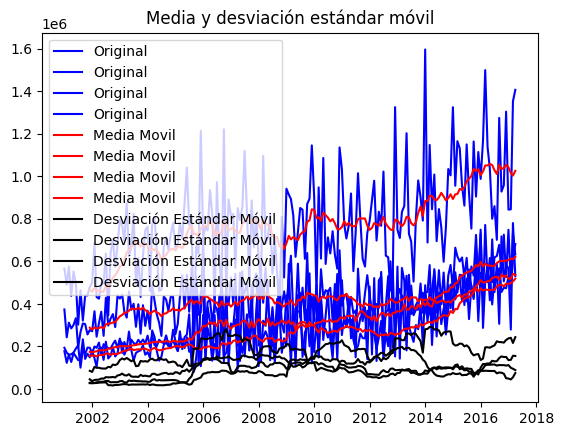

In [93]:
mediaMovil = train_impor.rolling(window=12).mean()
deMovil = train_impor.rolling(window=12).std()

original = plt.plot(train_impor, color="blue", label="Original")
media = plt.plot(mediaMovil, color='red', label = 'Media Movil')
ds = plt.plot(deMovil,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)

Parece que sí hay una tendencia creciente, ligeramente lineal

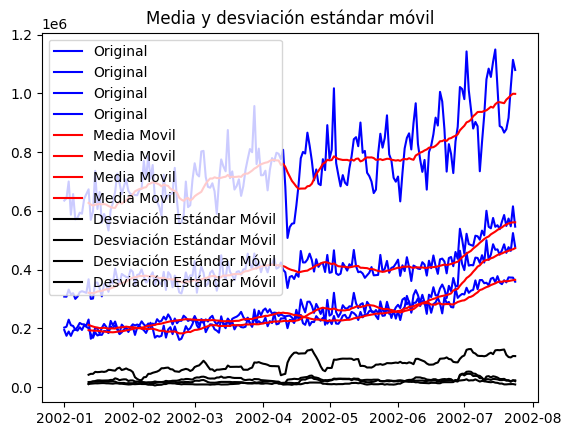

In [94]:
mediaMovil = train_consumo.rolling(window=12).mean()
deMovil = train_consumo.rolling(window=12).std()

original = plt.plot(train_consumo, color="blue", label="Original")
media = plt.plot(mediaMovil, color='red', label = 'Media Movil')
ds = plt.plot(deMovil,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)

Hay una tendencia clara en crecimiento, sin embargo, no es claro aún a qué modelo se apega más

### Descomposición

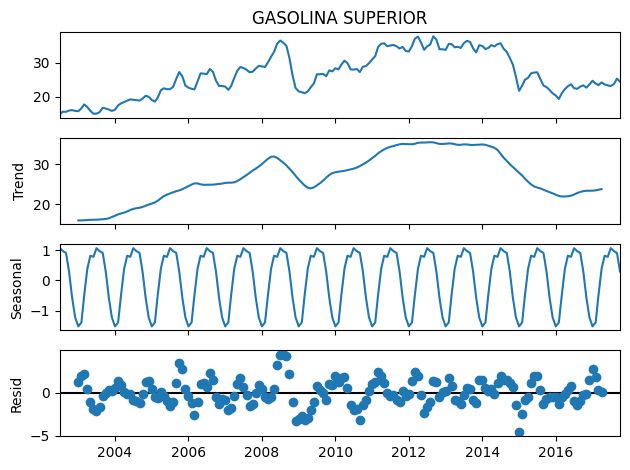

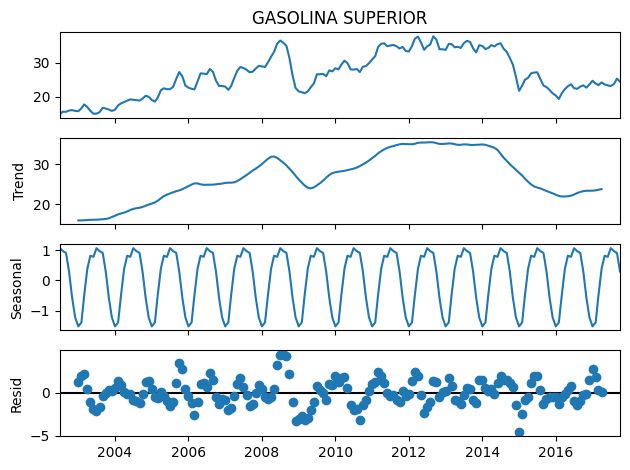

In [96]:
descomposicion = seasonal_decompose(train_precios["GASOLINA SUPERIOR"])
descomposicion.plot()

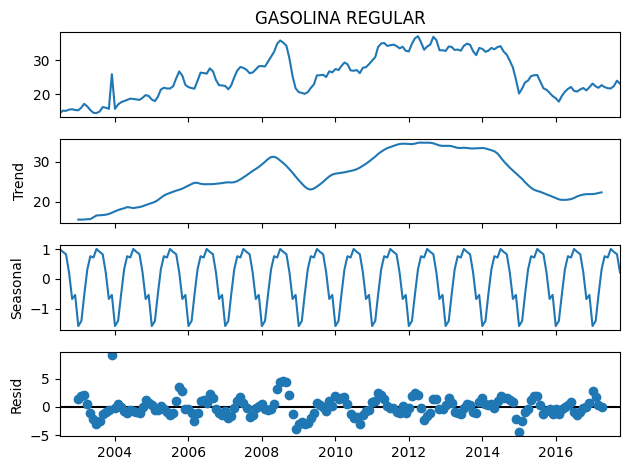

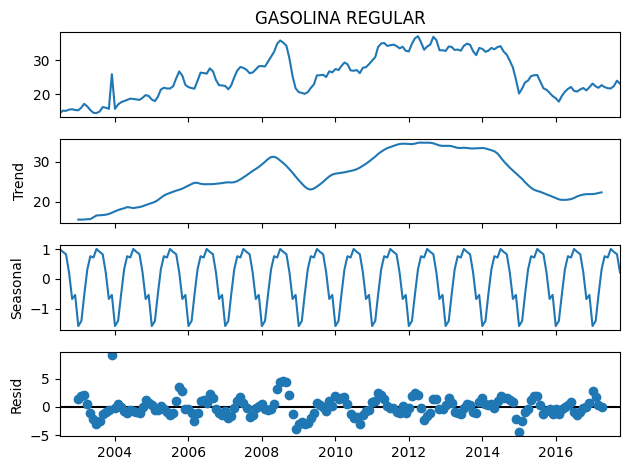

In [99]:
descomposicion = seasonal_decompose(train_precios["GASOLINA REGULAR"])
descomposicion.plot()

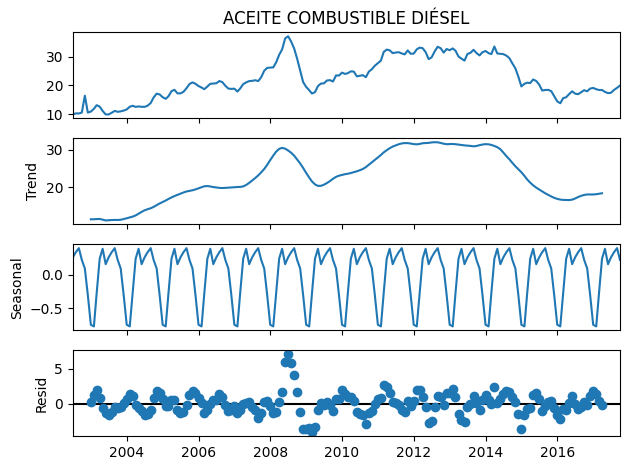

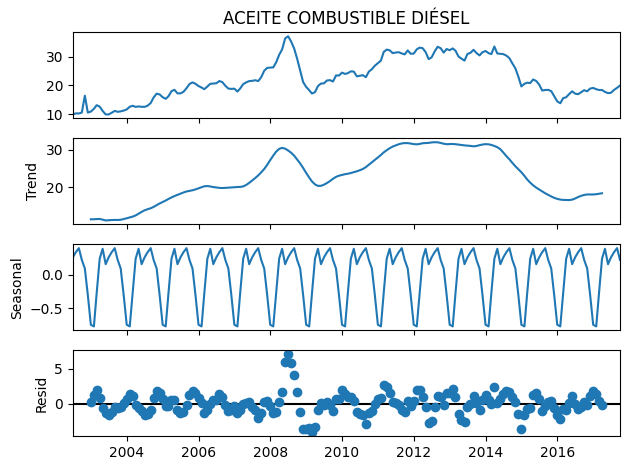

In [100]:
descomposicion = seasonal_decompose(train_precios["ACEITE COMBUSTIBLE DIÉSEL"])
descomposicion.plot()

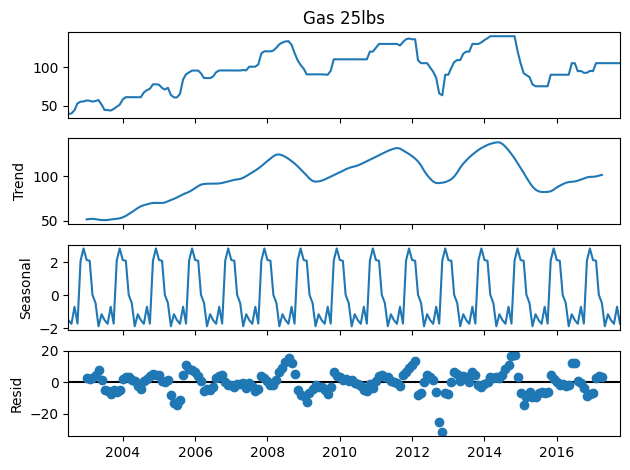

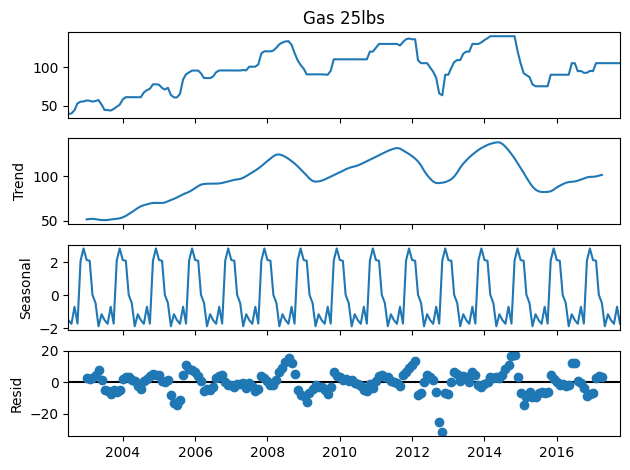

In [101]:
descomposicion = seasonal_decompose(train_gas["Gas 25lbs"])
descomposicion.plot()

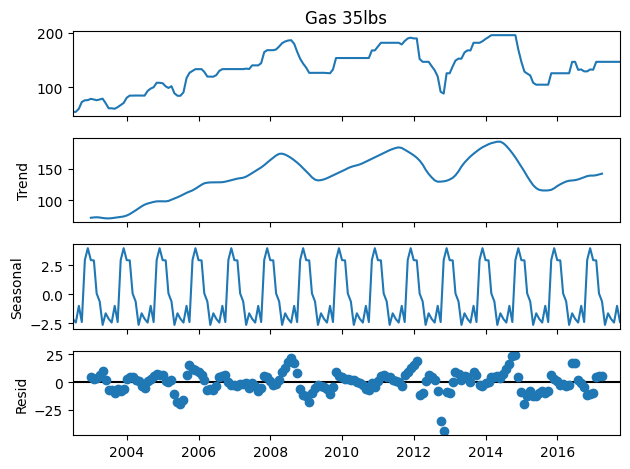

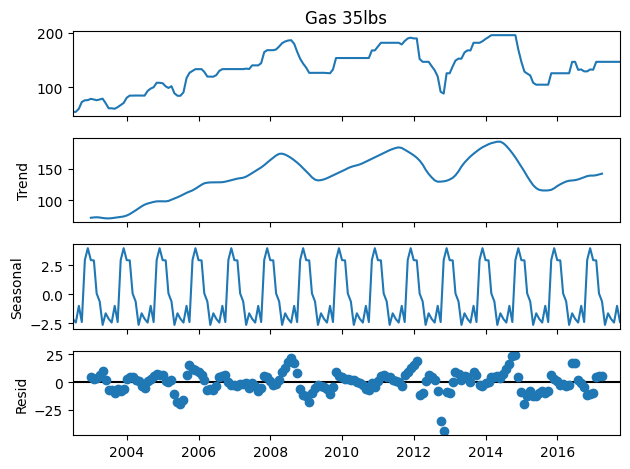

In [102]:
descomposicion = seasonal_decompose(train_gas["Gas 35lbs"])
descomposicion.plot()

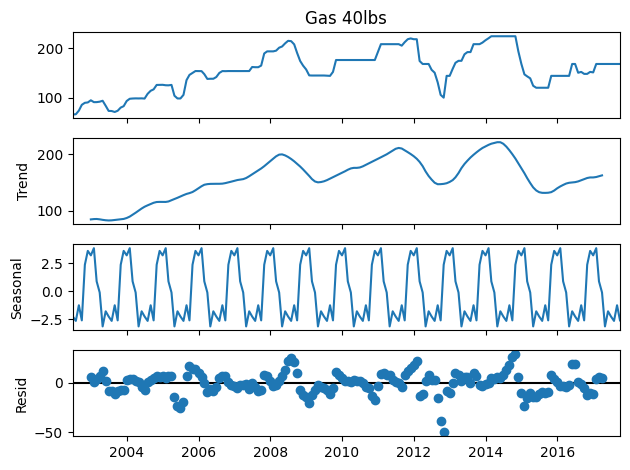

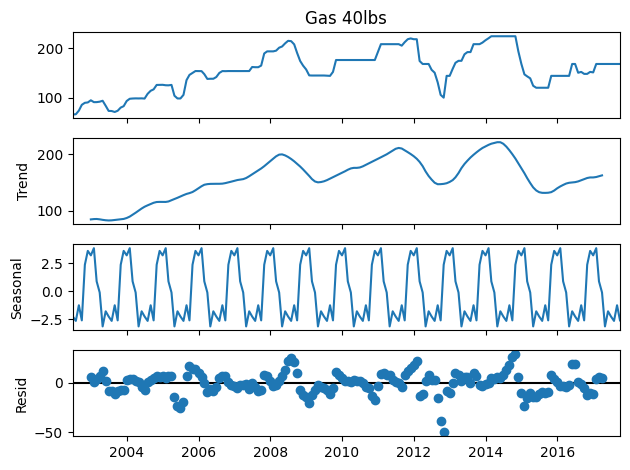

In [103]:
descomposicion = seasonal_decompose(train_gas["Gas 40lbs"])
descomposicion.plot()

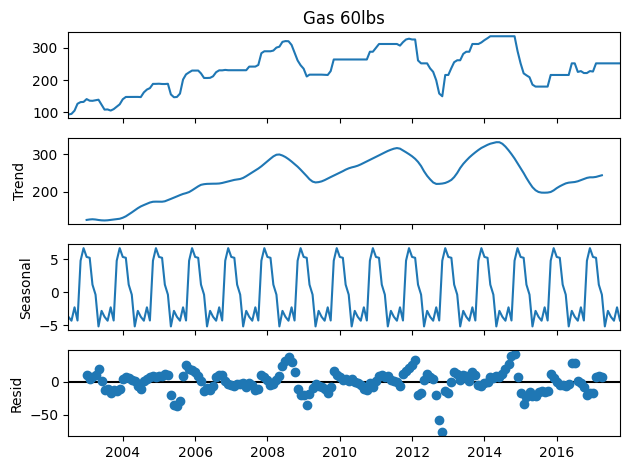

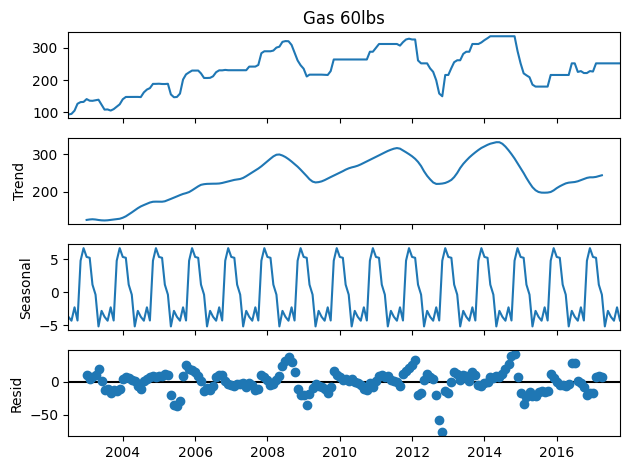

In [104]:
descomposicion = seasonal_decompose(train_gas["Gas 60lbs"])
descomposicion.plot()

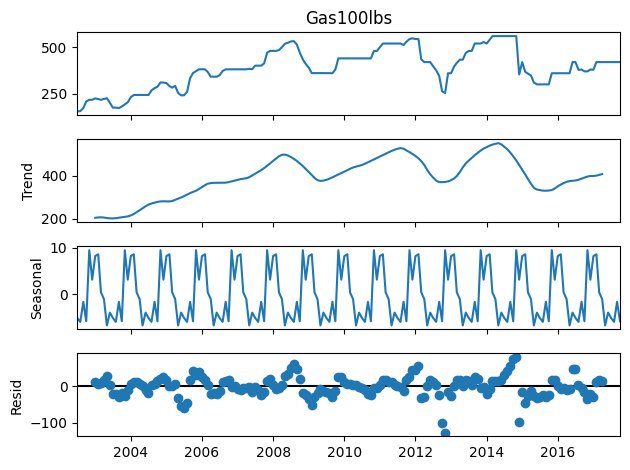

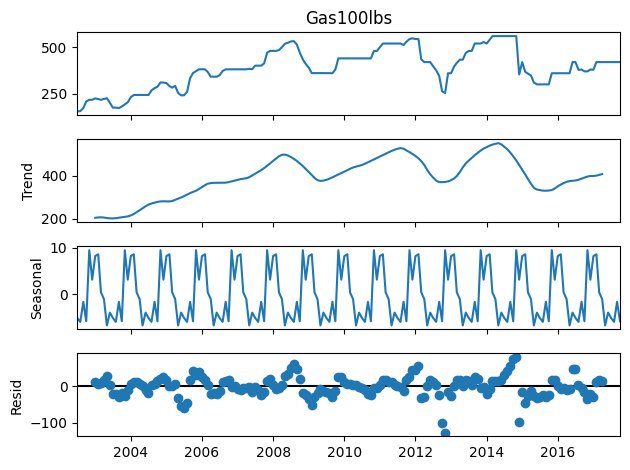

In [106]:
descomposicion = seasonal_decompose(train_gas["Gas100lbs"])
descomposicion.plot()

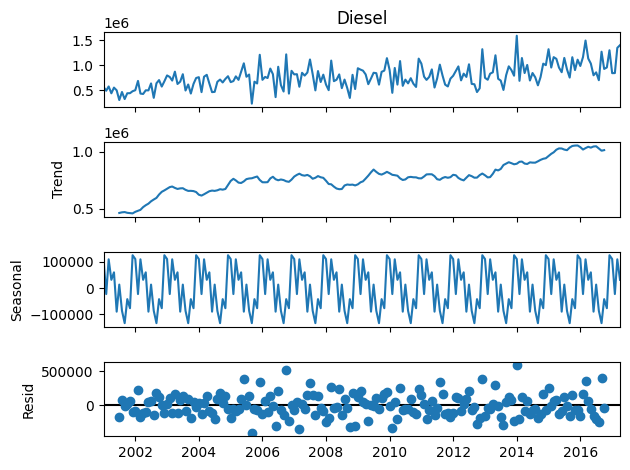

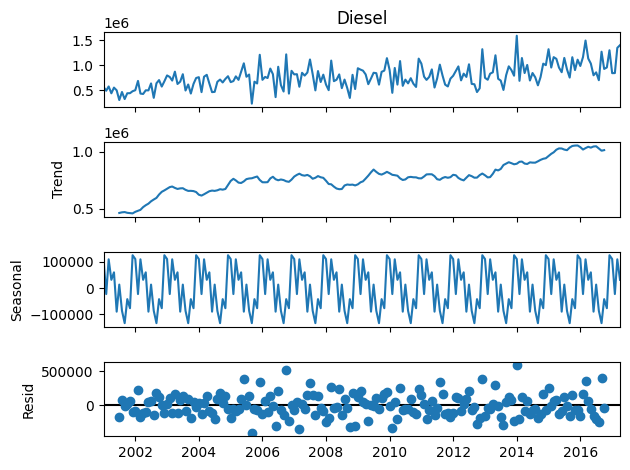

In [107]:
descomposicion = seasonal_decompose(train_impor["Diesel"])
descomposicion.plot()

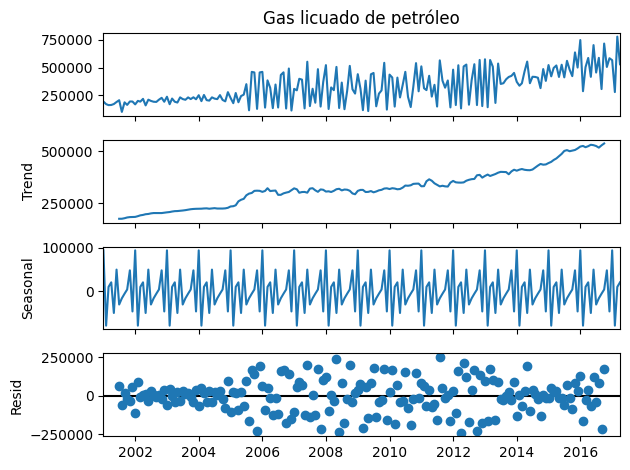

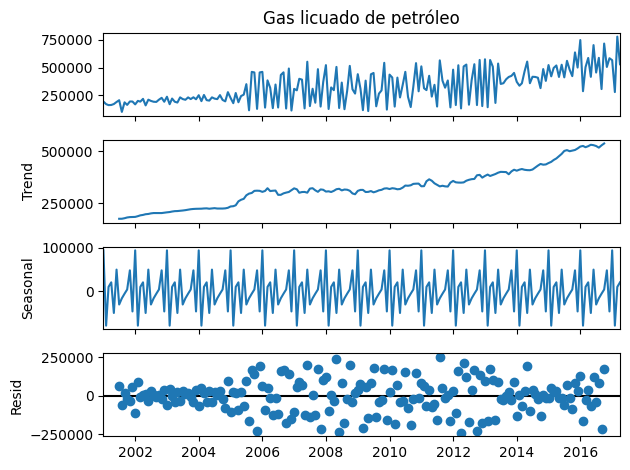

In [108]:
descomposicion = seasonal_decompose(train_impor["Gas licuado de petróleo"])
descomposicion.plot()

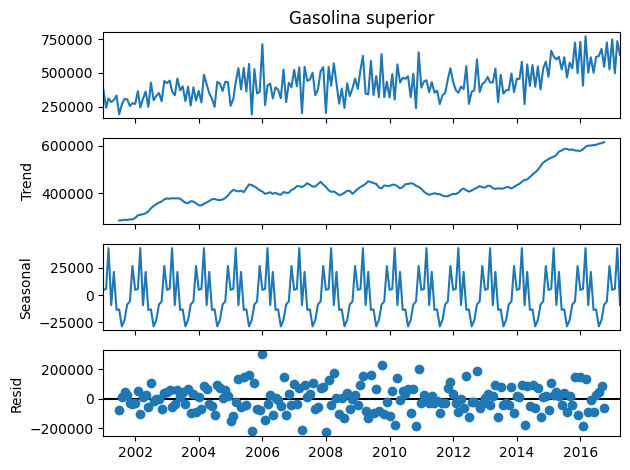

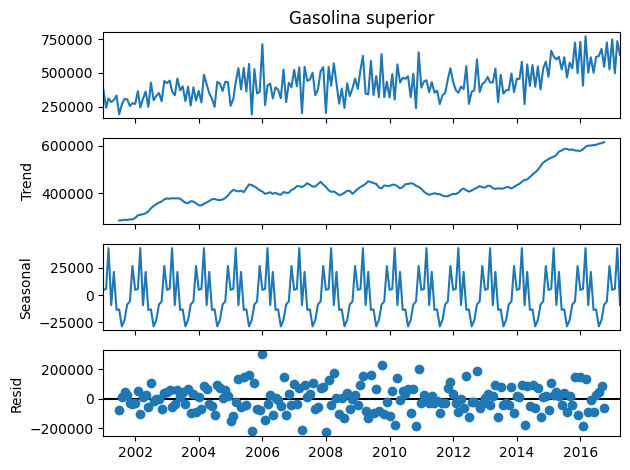

In [109]:
descomposicion = seasonal_decompose(train_impor["Gasolina superior"])
descomposicion.plot()

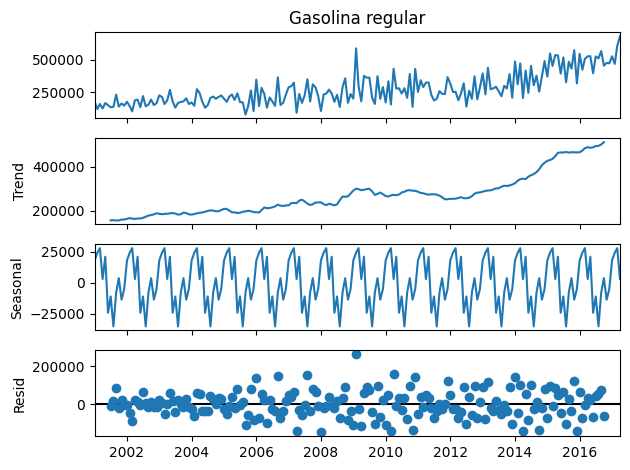

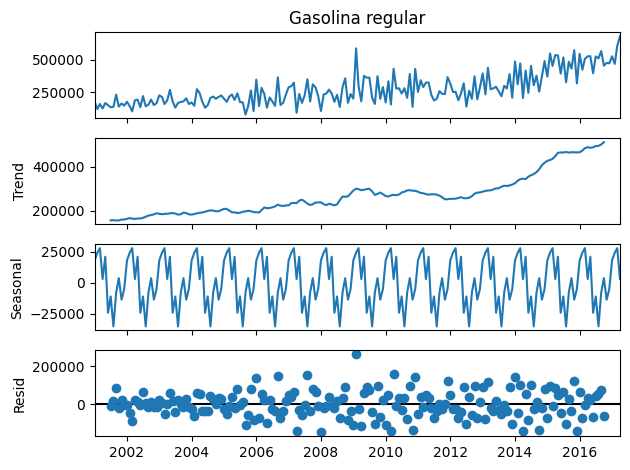

In [110]:
descomposicion = seasonal_decompose(train_impor["Gasolina regular"])
descomposicion.plot()

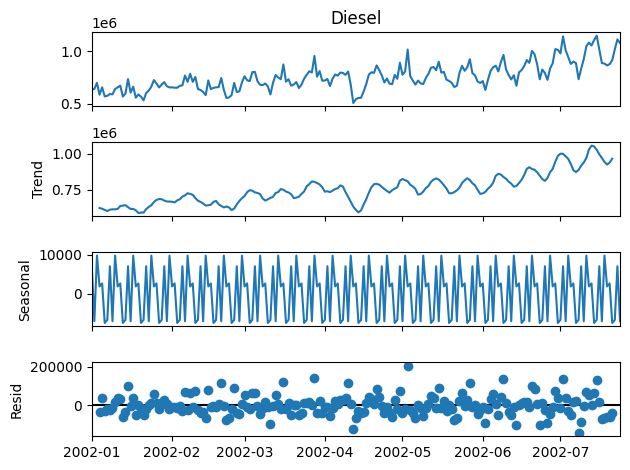

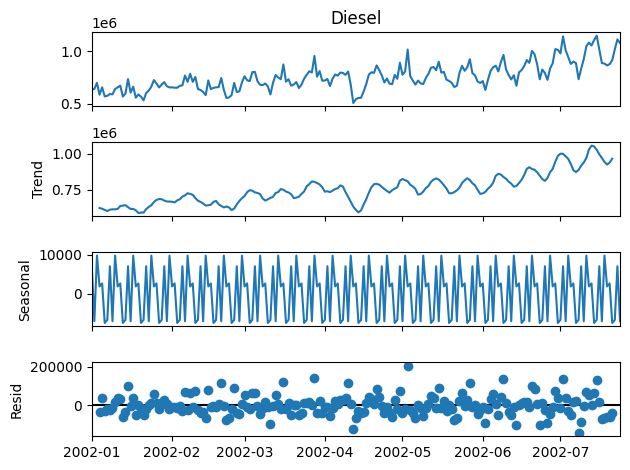

In [111]:
descomposicion = seasonal_decompose(train_consumo["Diesel"])
descomposicion.plot()

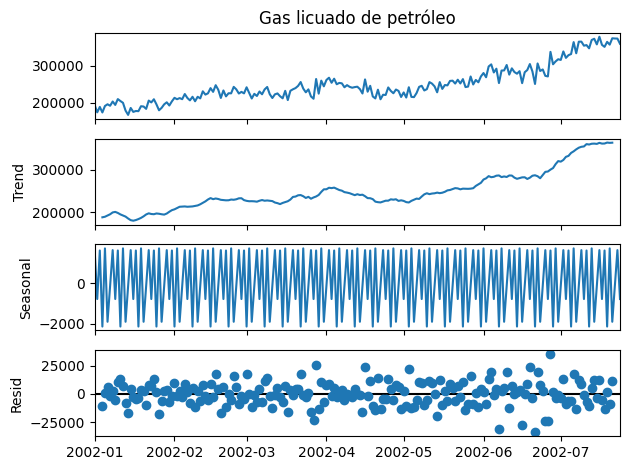

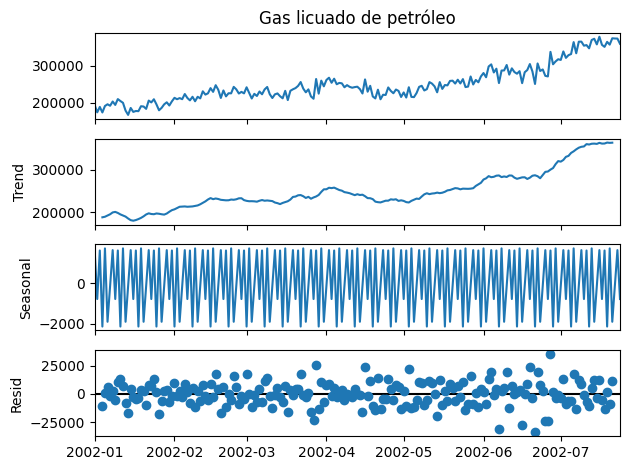

In [112]:
descomposicion = seasonal_decompose(train_consumo["Gas licuado de petróleo"])
descomposicion.plot()

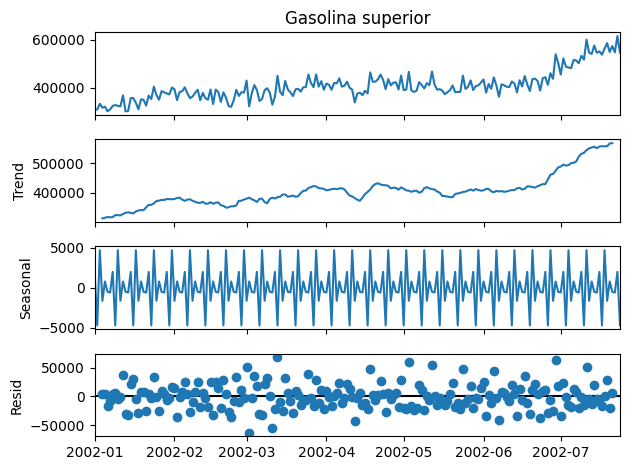

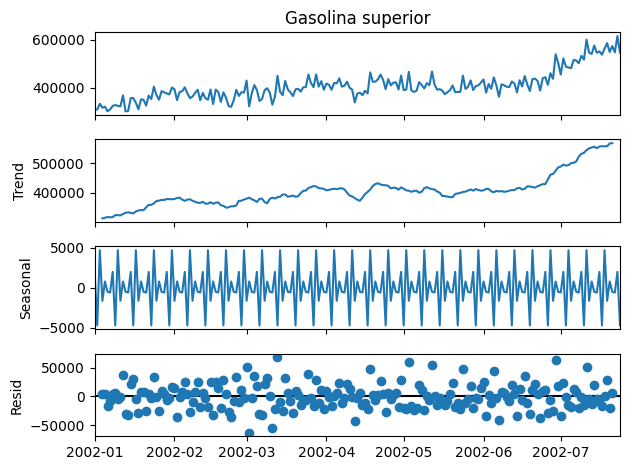

In [113]:
descomposicion = seasonal_decompose(train_consumo["Gasolina superior"])
descomposicion.plot()

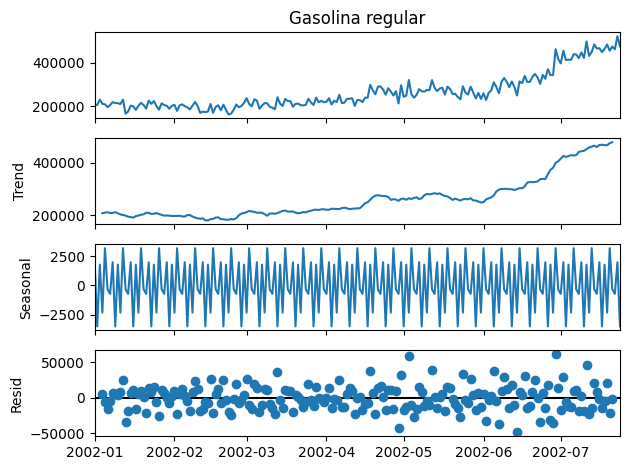

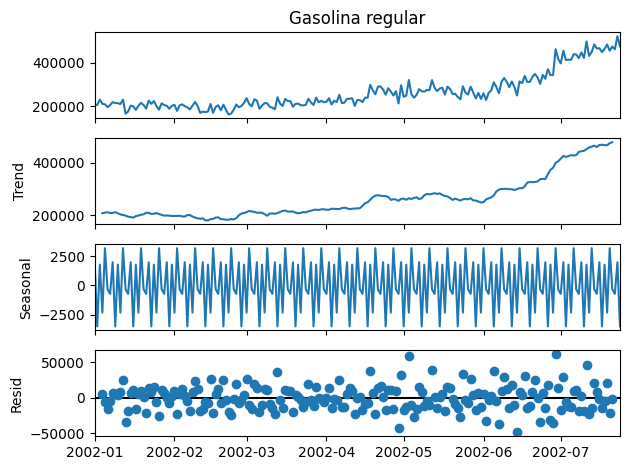

In [114]:
descomposicion = seasonal_decompose(train_consumo["Gasolina regular"])
descomposicion.plot()

Aunque las importaciones y el consumo parecen tender una tendencia lineal/exponencial respecto al avance por los años, vemos que todas las series tienen estacionaridad media, así como varianza media